In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import tensorflow as tf
import tensorflow_text as text
import heapq
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
import string
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

data_path = '../local_data/'

# Data Origin: https://huggingface.co/datasets/OpenCo7/UpVoteWeb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oyka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
working_df = pd.read_parquet(data_path + 'cleaned_df.parquet')
print(working_df.shape)

(4194304, 7)


In [4]:
sample_df = working_df.sample(n=50000, random_state=1234)

print(sample_df.describe())
print(sample_df.head())


              score   token_count
count  50000.000000  50000.000000
mean      11.486220     38.816120
std       90.370388     75.795813
min     -342.000000      1.000000
25%        1.000000      9.000000
50%        2.000000     19.000000
75%        6.000000     43.000000
max     8131.000000   5000.000000
              id   parent_id  post_id  \
387174   kfvp22c  t3_18w1b67  18w1b67   
157210   kfrpmb6  t1_kfqn4tk  18va664   
2025338  kfurav7  t1_kfqx3zx  18v8qeh   
2025602  kfxuiep  t3_14yqdz1  14yqdz1   
974849   kft4fx3  t1_kfswyqd  18vq93u   

                                                      text  \
387174      i won and picked 5th. took tyreek. worked out.   
157210             this is exactly what i was going to say   
2025338  my guy is definitely fugly. we brits are the s...   
2025602                                          r/breadit   
974849   https://preview.redd.it/dzfs20s88s9c1.jpeg?wid...   

                    subreddit  score  token_count  
387174        fantasyf

In [7]:
sample_df['tokenized'] = sample_df['text'].apply(lambda x: [word for word in nltk.word_tokenize(x) if word not in stop_words and word not in string.punctuation])



In [8]:
print(sample_df.head())

              id   parent_id  post_id  \
387174   kfvp22c  t3_18w1b67  18w1b67   
157210   kfrpmb6  t1_kfqn4tk  18va664   
2025338  kfurav7  t1_kfqx3zx  18v8qeh   
2025602  kfxuiep  t3_14yqdz1  14yqdz1   
974849   kft4fx3  t1_kfswyqd  18vq93u   

                                                      text  \
387174      i won and picked 5th. took tyreek. worked out.   
157210             this is exactly what i was going to say   
2025338  my guy is definitely fugly. we brits are the s...   
2025602                                          r/breadit   
974849   https://preview.redd.it/dzfs20s88s9c1.jpeg?wid...   

                    subreddit  score  token_count  \
387174        fantasyfootball      1           16   
157210                RLCraft      3           11   
2025338                  meme      1           49   
2025602  Damnthatsinteresting      1            4   
974849   OnePiecePowerScaling     13           69   

                                                 tokenized  


In [9]:
word_list = []

for row in sample_df['tokenized']:
    word_list.extend(row)

num_words = 6000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(word_list)
tokenized_train = tokenizer.texts_to_sequences(sample_df['tokenized'])

# Neural Network

In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.layers import Dropout


In [16]:
X = pad_sequences(tokenized_train, maxlen=500)
y = sample_df['score']

In [17]:
print(tokenized_train[0:5])

[[1415, 2720, 258, 509], [261, 38, 52], [165, 143, 905, 1024, 215, 798, 2459, 27, 244, 2551, 169, 4, 3142, 211, 2609, 1301], [], [13, 9, 9, 9]]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [19]:
print(X_train[0])
print(y_train.head())

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [93]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32, input_length=500))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(16))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           192000    
                                                                 
 dense_10 (Dense)            (None, 500, 16)           528       
                                                                 
 dropout_5 (Dropout)         (None, 500, 16)           0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                2112      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 194,657
Trainable params: 194,657
Non-trainable params: 0
_________________________________________________________________


In [108]:
results = model.fit(X_train, y_train, epochs=1, batch_size=128, validation_data=(X_test, y_test))

313/313 [==============================] - 30s 92ms/step - loss: 8630.5068 - mean_absolute_error: 14.3232 - mean_squared_error: 8630.5068 - val_loss: 6337.0186 - val_mean_absolute_error: 14.0831 - val_mean_squared_error: 6337.0186


In [95]:
model.save(data_path + 'lstm_model.h5')

In [96]:
model = tf.keras.models.load_model(data_path + 'lstm_model.h5')

In [115]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

313/313 [==============================] - 6s 19ms/step


In [98]:
print(y_pred[0:5])
print(y_test[0:5])

[[8.160612]
 [8.152142]
 [8.097958]
 [8.25823 ]
 [8.202179]]
1864174    7
1591824    2
909041    -7
2080100    2
37832      4
Name: score, dtype: int64


In [110]:
print(results.history)

{'loss': [8630.5068359375], 'mean_absolute_error': [14.323173522949219], 'mean_squared_error': [8630.5068359375], 'val_loss': [6337.0185546875], 'val_mean_absolute_error': [14.083123207092285], 'val_mean_squared_error': [6337.0185546875]}


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Training MAE: " + str(results.history['mean_absolute_error'][0]))
print("Training MSE: " + str(results.history['mean_squared_error'][0]))
print("Test MAE: " + str(results.history['val_mean_absolute_error'][0]))
print("Test MSE: " + str(results.history['val_mean_squared_error'][0]))


Training MAE: 14.323173522949219
Training MSE: 8630.5068359375
Test MAE: 14.083123207092285
Test MSE: 6337.0185546875


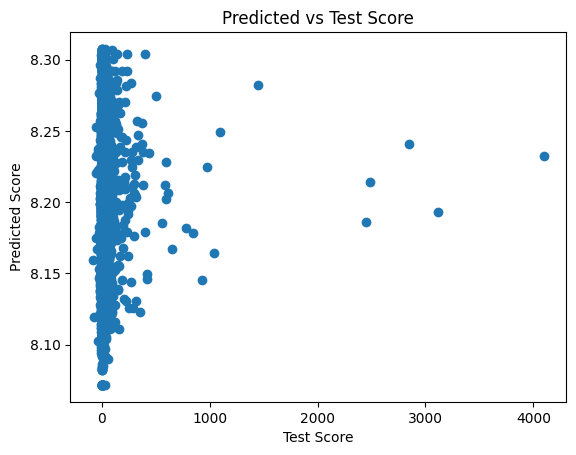

In [114]:
# Validation Score
plt.scatter(y_test, yhat_test)
plt.title('Validation Predicted vs Actual Score')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()